# Distribution of insolation

Here are some examples calculating daily average insolation at different locations and times.

These all use a function called `daily_insolation` in the module `insolation.py` to do the calculation. The code calculates daily average insolation anywhere on Earth at any time of year for a given set of orbital parameters.

To look at past orbital variations and their effects on insolation, we use the module `orbital.py` which accesses tables of values for the past 5 million years. We can easily lookup parameters for any point in the past and pass these to `daily_insolation`. 

In [1]:
from __future__ import division, print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from climlab import constants as const
from climlab.solar.insolation import daily_insolation
from climlab.solar.orbital import OrbitalTable

## Present-day orbital parameters

Calculate an array of insolation over the year and all latitudes (for present-day orbital parameters).

In [2]:
lat = np.linspace( -90., 90., 500. )
days = np.linspace(0, const.days_per_year, 365. )
Q = daily_insolation( lat, days )

/Users/br546577/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/Users/br546577/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


And make a contour plot of Q as function of latitude and time of year.

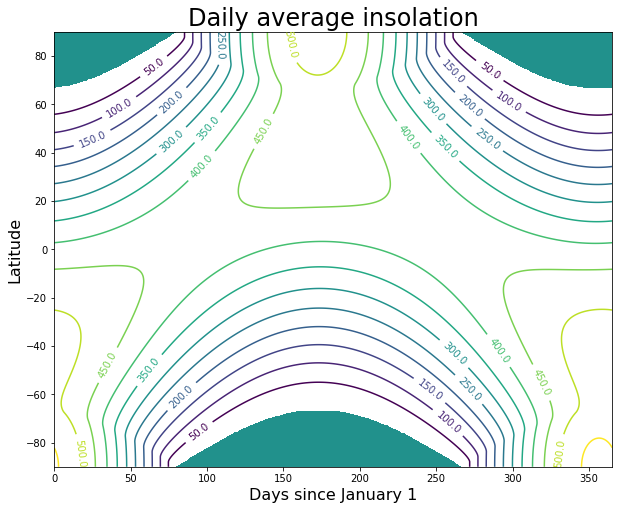

In [3]:
ax = plt.figure( figsize=(10,8) ).add_subplot(111)
CS = ax.contour( days, lat, Q , levels = np.arange(0., 600., 50.) )
ax.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
ax.set_xlabel('Days since January 1', fontsize=16 )
ax.set_ylabel('Latitude', fontsize=16 )
ax.set_title('Daily average insolation', fontsize=24 )
ax.contourf ( days, lat, Q, levels=[-500., 0.] )
plt.show()

Take the area-weighted global, annual average of Q...

In [4]:
print(np.sum( np.mean( Q, axis=1 ) * np.cos( np.deg2rad(lat) ) ) / np.sum( np.cos( np.deg2rad( lat ) ) ))

341.384184481


Also plot the zonally averaged insolation at a few different times of the year:

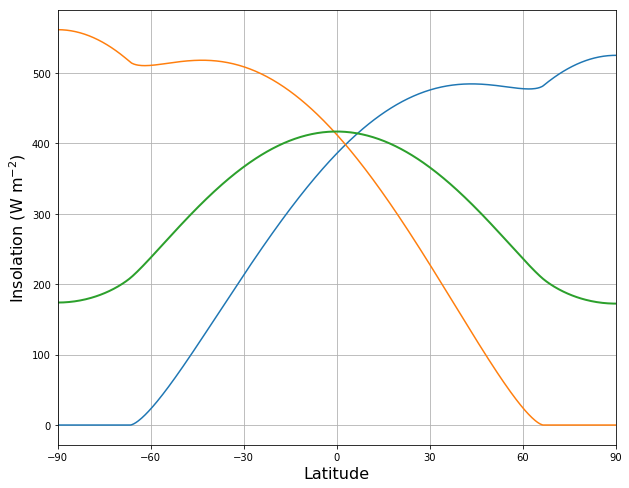

In [5]:
summer_solstice = 170
winter_solstice = 353
ax = plt.figure( figsize=(10,8) ).add_subplot(111)
ax.plot( lat, Q[:,(summer_solstice, winter_solstice)] );
ax.plot( lat, np.mean(Q, axis=1), linewidth=2 )
ax.set_xbound(-90, 90)
ax.set_xticks( range(-90,100,30) )
ax.set_xlabel('Latitude', fontsize=16 );
ax.set_ylabel('Insolation (W m$^{-2}$)', fontsize=16 );
ax.grid()
plt.show()

## Past orbital parameters

The `orbital.py` code allows us to look up the orbital parameters for Earth over the last 5 million years. 

Make reference plots of the variation in the three orbital parameter over the last 1 million years

In [6]:
kyears = np.arange( -1000., 1.)
table = OrbitalTable()
orb = table.lookup_parameters( kyears )

Loading Berger and Loutre (1991) orbital parameter data from file /Users/br546577/anaconda3/lib/python3.6/site-packages/climlab/solar/orbit91


The Python object `orb` now holds 1 million years worth of orbital data, total of 1001 data points for each element: eccentricity `ecc`, obliquity angle `obliquity`, and solar longitude of perihelion `long_peri`.

In [7]:
print(orb)
print(np.shape( orb['ecc'] ), np.shape( orb['long_peri'] ), np.shape( orb['obliquity'] ))

{'ecc': array([ 0.035765,  0.036953,  0.038114, ...,  0.018024,  0.017644,
        0.017236]), 'long_peri': array([ 122.46,  138.29,  154.17, ...,  247.23,  264.26,  281.37]), 'obliquity': array([ 23.778,  23.835,  23.877, ...,  23.697,  23.573,  23.446])}
(1001,) (1001,) (1001,)


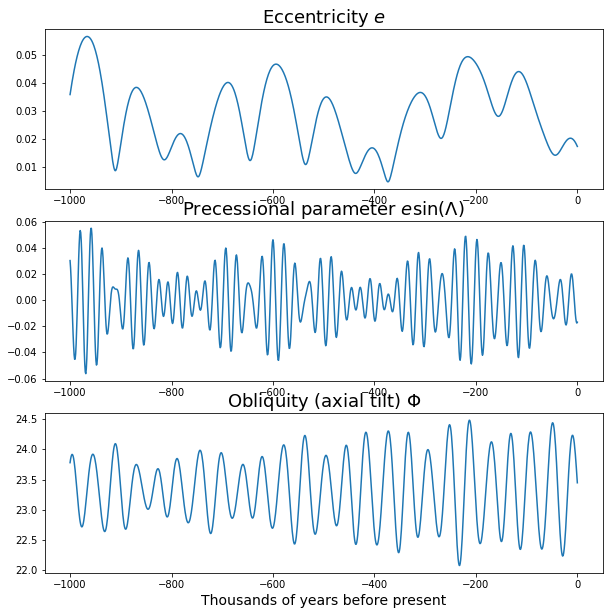

In [8]:
fig = plt.figure( figsize = (10,10) )
ax1 = fig.add_subplot(3,1,1)
ax1.plot( kyears, orb['ecc'] )
ax1.set_title('Eccentricity $e$', fontsize=18 )
ax2 = fig.add_subplot(3,1,2)
ax2.plot( kyears, orb['ecc'] * np.sin( np.deg2rad( orb['long_peri'] ) ) )
ax2.set_title('Precessional parameter $e \sin(\Lambda)$', fontsize=18 )
ax3 = fig.add_subplot(3,1,3)
ax3.plot( kyears, orb['obliquity'] )
ax3.set_title('Obliquity (axial tilt) $\Phi$', fontsize=18 )
ax3.set_xlabel( 'Thousands of years before present', fontsize=14 )
plt.show()

### Annual mean insolation

Create a large array of insolation over the whole globe, whole year, and for every set of orbital parameters.

In [9]:
lat = np.linspace(-90, 90, 181)
days = np.linspace(1.,50.)/50 * const.days_per_year
Q = daily_insolation(lat, days, orb)
print(Q.shape)

(181, 50, 1001)


In [10]:
Qann = np.mean(Q, axis=1)  # time average over the year
print(Qann.shape)
Qglobal = np.empty_like( kyears )
for n in range( kyears.size ):   # global area-weighted average
    Qglobal[n] = np.sum( Qann[:,n] * np.cos( np.deg2rad(lat) ) ) / np.sum( np.cos( np.deg2rad(lat) ) )
print(Qglobal.shape)

(181, 1001)
(1001,)


We are going to create a figure showing past time variations in three quantities:

1. Global, annual mean insolation
2. Annual mean insolation at high northern latitudes
3. Summer solstice insolation at high northern latitudes

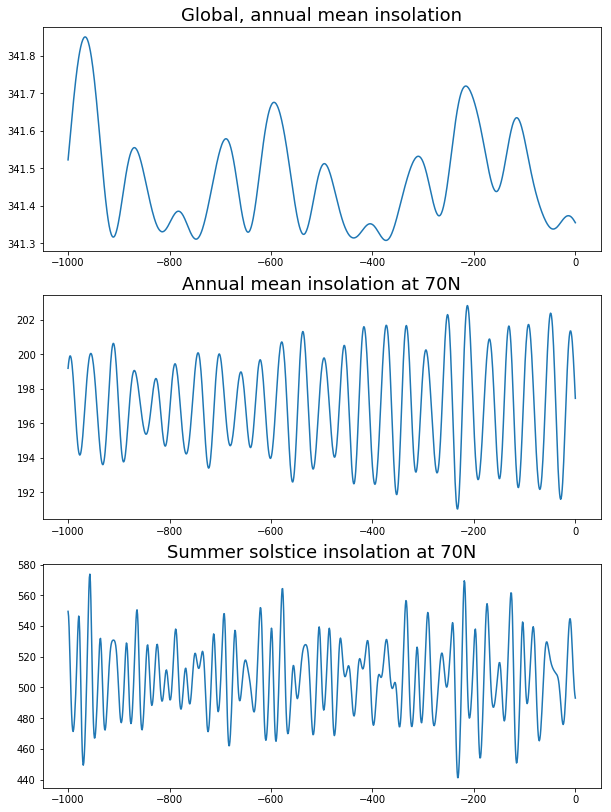

In [11]:
fig = plt.figure( figsize = (10,14) )

ax1 = fig.add_subplot(3,1,1)
ax1.plot( kyears, Qglobal )
ax1.set_title('Global, annual mean insolation', fontsize=18 )
ax1.ticklabel_format( useOffset=False )

ax2 = fig.add_subplot(3,1,2)
ax2.plot( kyears, Qann[160,:] )
ax2.set_title('Annual mean insolation at 70N', fontsize=18 )

ax3 = fig.add_subplot(3,1,3)
ax3.plot( kyears, Q[160,23,:] )
ax3.set_title('Summer solstice insolation at 70N', fontsize=18 )

plt.show()

And comparing with the plots of orbital variations above, we see that

1. Global annual mean insolation variations on with eccentricity (slow), and the variations are very small!
2. Annual mean insolation varies with obliquity (medium). Annual mean insolation does NOT depend on precession!
3. Summer solstice insolation at high northern latitudes is affected by both precession and obliquity. The variations are large.

### Insolation changes between the Last Glacial Maximum and the end of the last ice age

Last Glacial Maximum or "LGM" occurred around 23,000 years before present, when the ice sheets were at their greatest extent. By 10,000 years ago, the ice sheets were mostly gone and the last ice age was over. Let's plot the changes in the seasonal distribution of insolation from 23 kyrs to 10 kyrs.

In [12]:
orb_0 = table.lookup_parameters( 0 )  # present-day orbital parameters
orb_10 = table.lookup_parameters( -10 )  # orbital parameters for 10 kyrs before present
orb_23 = table.lookup_parameters( -23 )   # 23 kyrs before present
Q_0 = daily_insolation( lat, days, orb_0 )    
Q_10 = daily_insolation( lat, days, orb_10 )   # insolation arrays for each of the three sets of orbital parameters
Q_23 = daily_insolation( lat, days, orb_23 )

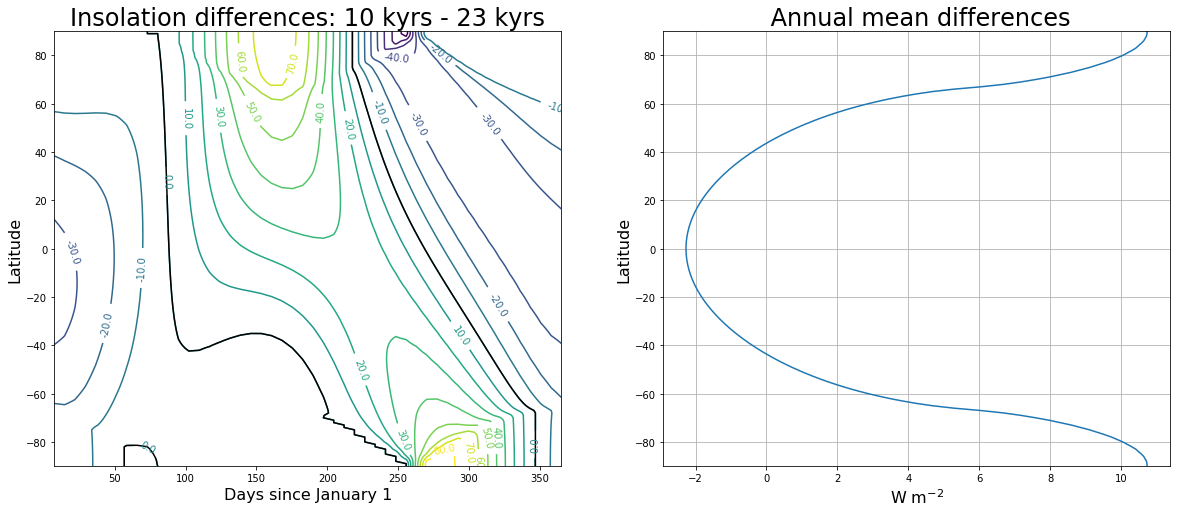

In [13]:
fig = plt.figure( figsize=(20,8) )

ax1 = fig.add_subplot(1,2,1)
Qdiff = Q_10 - Q_23
CS1 = ax1.contour( days, lat, Qdiff, levels = np.arange(-100., 100., 10.) )
ax1.clabel(CS1, CS1.levels, inline=True, fmt='%r', fontsize=10)
ax1.contour( days, lat, Qdiff, levels = [0.], colors = 'k' )
ax1.set_xlabel('Days since January 1', fontsize=16 )
ax1.set_ylabel('Latitude', fontsize=16 )
ax1.set_title('Insolation differences: 10 kyrs - 23 kyrs', fontsize=24 )

ax2 = fig.add_subplot(1,2,2)
ax2.plot( np.mean( Qdiff, axis=1 ), lat )
ax2.set_xlabel('W m$^{-2}$', fontsize=16 )
ax2.set_ylabel( 'Latitude', fontsize=16 )
ax2.set_title(' Annual mean differences', fontsize=24 )
ax2.set_ylim((-90,90))
ax2.grid()

plt.show()

The annual mean plot shows a classic obliquity signal: at 10 kyrs, the axis close to its maximum tilt, around 24.2º. At 23 kyrs, the tilt was much weaker, only about 22.7º. In the annual mean, a stronger tilt means more sunlight to the poles and less to the equator. This is very helpful if you are trying to melt an ice sheet.

Finally, take the area-weighted global average of the difference:

In [14]:
print(np.average(np.mean(Qdiff,axis=1), weights=np.cos(np.deg2rad(lat))))

0.00651043078327


This confirms that the difference is tiny (and due to very small changes in the eccentricity). **Ice ages are driven by seasonal and latitudinal redistributions of solar energy**, NOT by changes in the total global amount of solar energy!